# Lyaer Explaination

In [90]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import *
from IPython.display import Image

In [91]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

image = train_x[0]

image.shape: (28, 28)


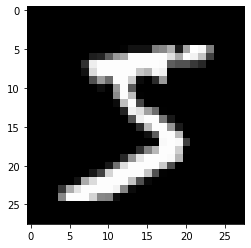

In [92]:
print("image.shape:",image.shape) # 먼저 이미지 사이즈 개수 등 확인 중요

plt.imshow(image, 'gray')
plt.show()

# Feature Extraction


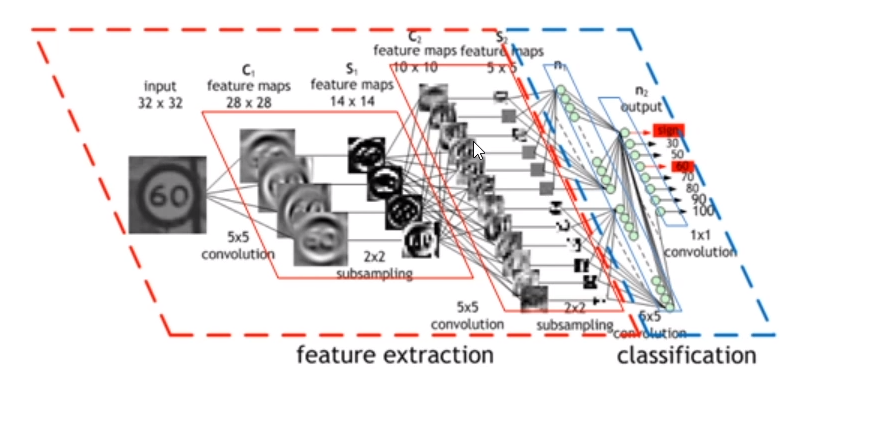

In [93]:
# 차원 수 높이기 
image = image[tf.newaxis, ..., tf.newaxis]
Image("img1.png")

filters : layer에서나갈 때 filter를 만들 것인지(a.k.a weights, filters, channels)

kernel_size : filter(Weight)의 사이즈

strides : 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지(사이즈에도 영향을 준다.)

padding : zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있다. (사이즈 영향을 준다.)

activation : Activation Function을 만들것인지, 당장 설정 안해도 Layer층을 따로 만들 수 있다.

In [94]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME', activation='relu')

In [95]:
tf.keras.layers.Conv2D(3, 3, 1, 'SAME') # 이런 형식도 가능

# Visualization
 -tf.keras.layers.Conv2D

In [96]:
image = tf.cast(image, tf.float32)
image.dtype

tf.float32

In [102]:
layer = tf.keras.layers.Conv2D(5,3,1, padding='SAME')
output = layer(image)



## weight 불러오기
layer.get_weights()


In [103]:
weight = layer.get_weights() 
len(weight) # 2개 앞에는 weight  뒤는 bias

2

In [104]:
weight[0].shape, weight[1].shape # 각각 순서대로 weight, bias

((3, 3, 1, 5), (5,))

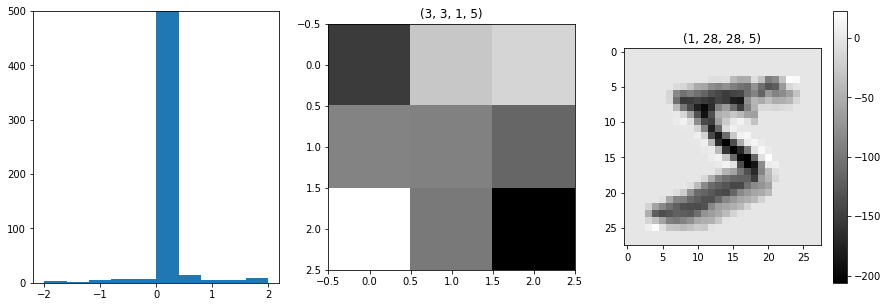

In [105]:
weight = layer.get_weights()[0]

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(weight.shape)
plt.imshow(weight[:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

In [106]:
import numpy as np
np.min(output), np.max(output) # 0 미만 다 없앤다. 0으로 바꿔준다. 활성화 함수 

(-205.93974, 239.65953)

# Activation Function


In [108]:
tf.keras.layers.ReLU() # ReLU 함수

In [109]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [111]:
act_output.shape, output.shape

(TensorShape([1, 28, 28, 5]), TensorShape([1, 28, 28, 5]))

In [112]:
np.min(act_output), np.max(act_output)
# 0미만은 전부 0으로 바뀜. 최저값. 

(0.0, 239.65953)

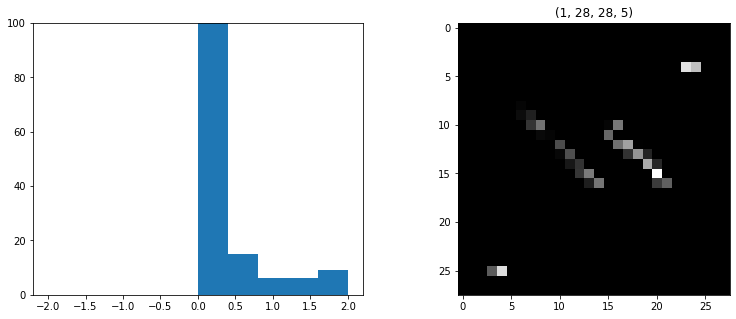

In [115]:
plt.figure(figsize=(13,5))
plt.subplot(121) # 1 by 2  1
plt.hist(act_output.numpy().ravel(), range=[-2, 2]) # ravel 1차원 변형
plt.ylim(0, 100) # 100까지

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0], 'gray')
plt.show()

# Pooling
tf.keras.layers.MaxPool2D 최댓값만 추출 - 압축

In [116]:
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [122]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME') # 보통 pool_size 2,2 스트라이드도 2,2 사용
pool_output = pool_layer(act_output)

In [123]:
act_output.shape, pool_output.shape

(TensorShape([1, 28, 28, 5]), TensorShape([1, 14, 14, 5]))

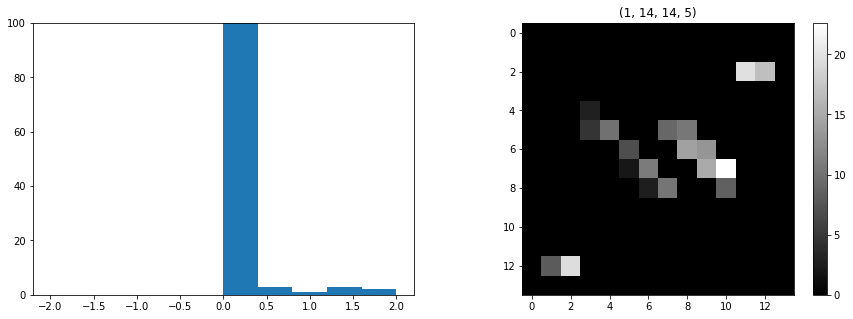

In [124]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

# Fully Connected

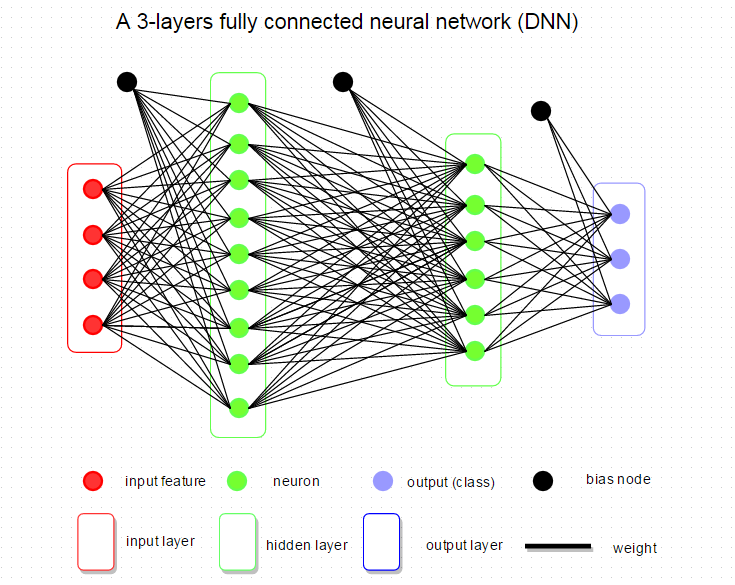


In [126]:
# y = wX + b # y는 노드, X = input, w = weight, b = bias 편향

# Flatten
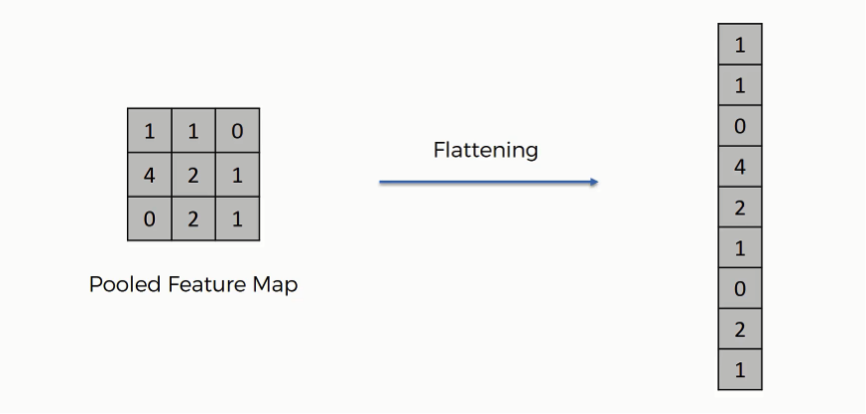

tf.keras.layers.Flatten()

In [128]:
import tensorflow as tf

In [129]:
tf.keras.layers.Flatten()

In [132]:
layer = tf.keras.layers.Flatten()
flatten = layer(output)
output.shape

TensorShape([1, 28, 28, 5])

In [134]:
flatten.shape
# 28 * 28 * 5 = 3920 
# 남은 1은 배치 사이즈 - 

TensorShape([1, 3920])

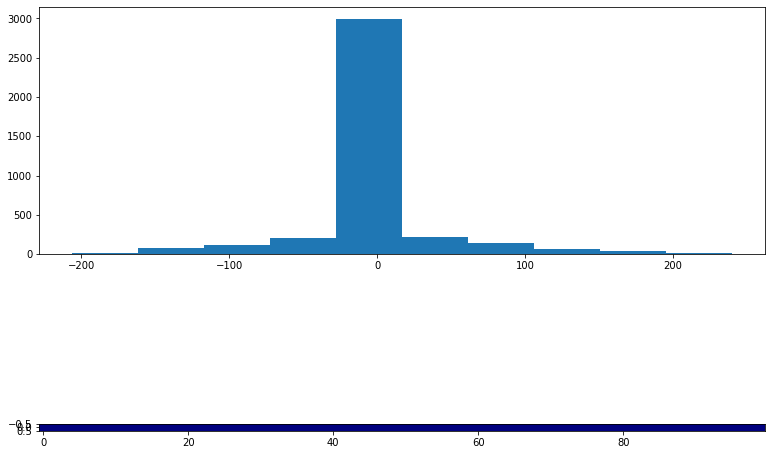

In [137]:
plt.figure(figsize=(13, 10))
plt.subplot(211) 
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:,:100], 'jet')
plt.show()

# Dense
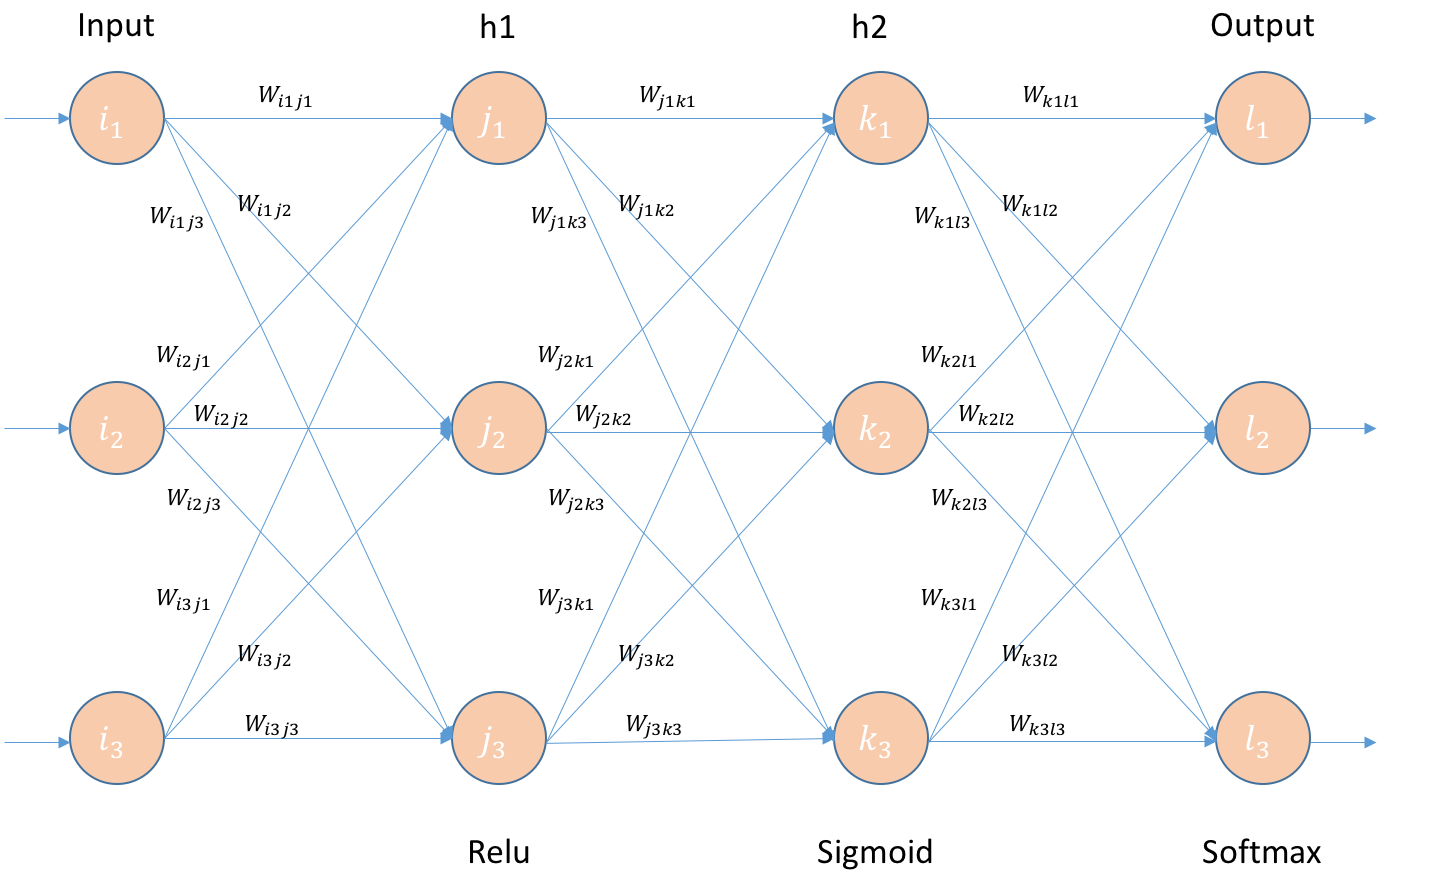
tf.keras.layers.Dense

하나씩 하나씩 전부 연결하겠다는 뜻

In [141]:
tf.keras.layers.Dense(32, activation='relu') # 32 units 개수 받을 때 3920이면 32개를 연결하겠다는 뜻
# activation relu 를 거쳐서 내보내진다.

In [146]:
layer = tf.keras.layers.Dense(32, activation='relu')
output = layer(flatten)
output.shape # 32 로 변함


TensorShape([1, 32])

In [148]:
layer_2 = tf.keras.layers.Dense(10, activation='relu')
output_example = layer_2(output)
output_example.shape, output.shape # 32개를 10개로 만들고 10개로 내보낸다.

(TensorShape([1, 10]), TensorShape([1, 32]))

# Dropout
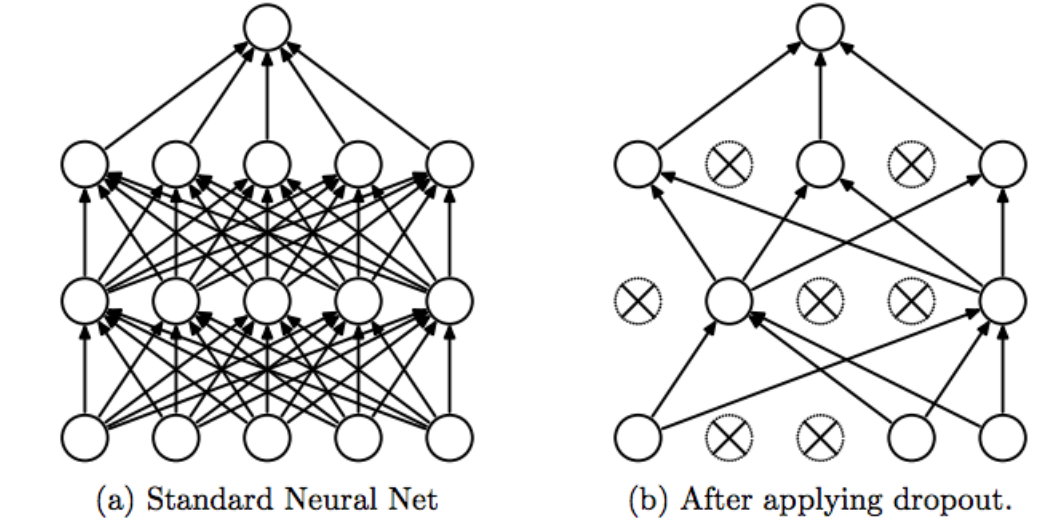
왼쪽 어떤 것은 잘되고 어떤 것은 안되는데 overfitting 어느 한 곳에 지정해서만 학습이 고정됨


오른쪽처럼 끊고 안끊고를 해서 모델이 골고루 잘 학습이 되게 

학습을 할 경우에만 오른쪽 처럼 변경 끝나면 왼쪽처럼 다시 돌아옴

tf.keras.layers.Dropout

In [149]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)
output.shape

TensorShape([1, 32])

# Build Model
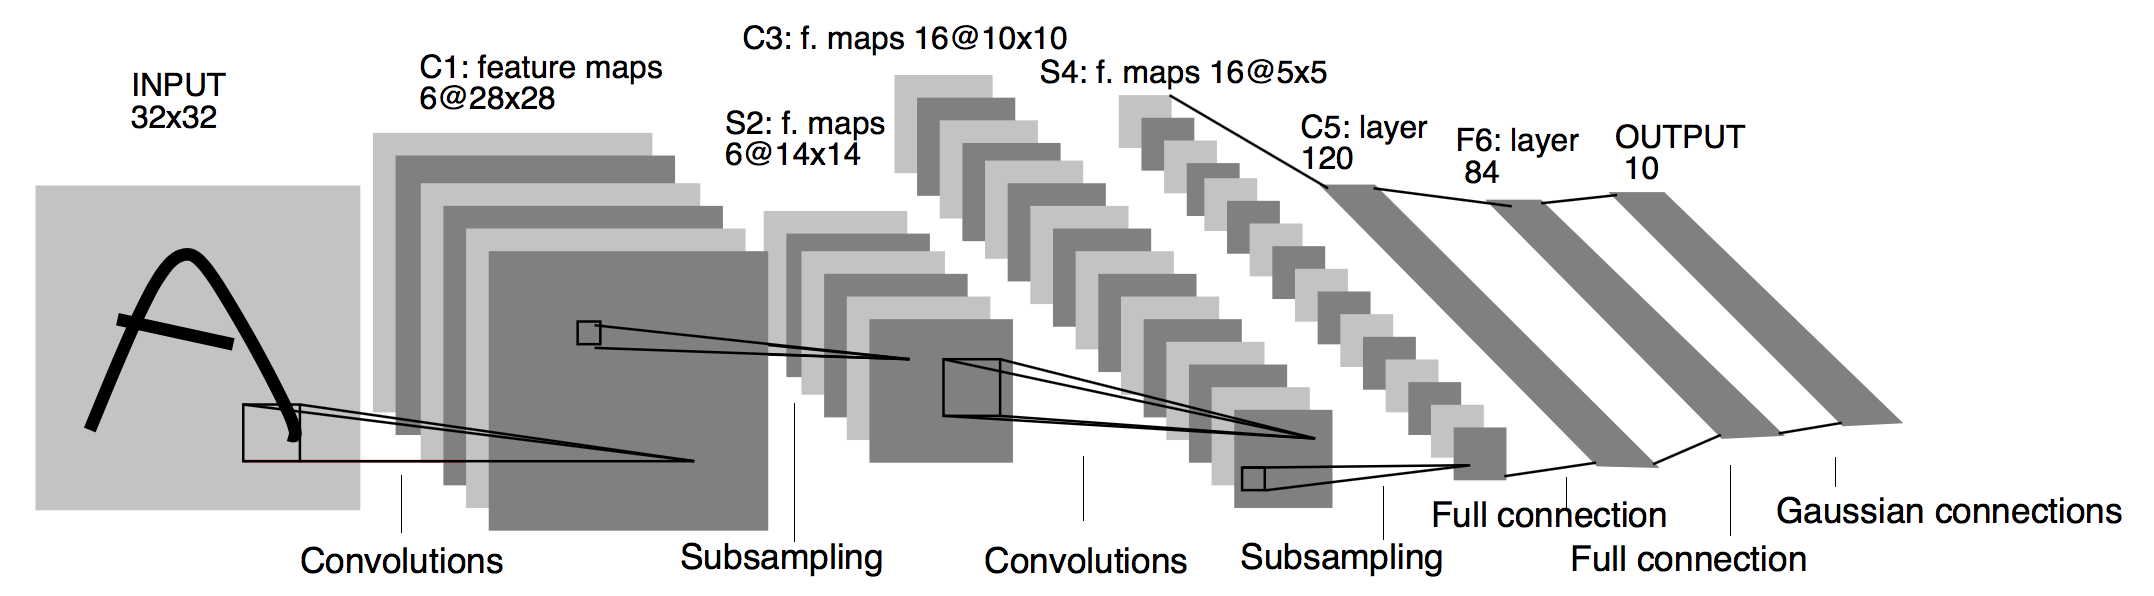
전체 해보기

In [151]:
from tensorflow.keras import layers

In [152]:
input_shape = (28,28, 1)
num_classes = 10


In [154]:
inputs = layers.Input(shape=input_shape)

# Feature Extraction
net = layers.Conv2D(32, 3, padding='SAME')(inputs) # 첫 layer만 input
net = layers.Activation('relu')(net) # relu con
net = layers.Conv2D(32, 3, padding='SAME')(net) #net
net = layers.Activation('relu')(net) # relu con 
net = layers.MaxPool2D((2,2))(net) # 최대값만 뽑아 압축 
net = layers.Dropout(0.25)(net) # 
## 여기까지가 첫 Convolutions block

net = layers.Conv2D(64, 3, padding='SAME')(net) 
net = layers.Activation('relu')(net) # relu con
net = layers.Conv2D(64, 3, padding='SAME')(net) #net
net = layers.Activation('relu')(net) # relu con 
net = layers.MaxPool2D((2,2))(net) # 최대값만 뽑아 압축 
net = layers.Dropout(0.25)(net) # 
# convolution 64 로 변경

# Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net) # 내보내는 노드가 10개가 되어야 한다. - 클래스 개수만큼 만들어야 한다.
net = layers.Activation('softmax')(net) # softmax는 총합 1로 바꿔줘서 정답이 무엇인지 알기쉽게 바꿔준다.

model = tf.keras.Model(inputs=inputs, outputs=net, name ='Basic_CNN')

In [155]:
model

In [156]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0 